### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.manifold import TSNE
from scipy.stats import iqr, entropy
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

### List of file paths for datasets with different silicon defect percentages

In [2]:
# File paths for datasets with 1% silicon defects

file_paths_1pct = ['D:/New folder/silicon_defect_1pct_random indices_01.csv', 'D:/New folder/silicon_defect_1pct_random indices_02.csv', 'D:/New folder/silicon_defect_1pct_random indices_03.csv', 'D:/New folder/silicon_defect_1pct_random indices_04.csv', 'D:/New folder/silicon_defect_1pct_random indices_05.csv','D:/New folder/silicon_defect_1pct_random indices_06.csv','D:/New folder/silicon_defect_1pct_random indices_07.csv','D:/New folder/silicon_defect_1pct_random indices_08.csv','D:/New folder/silicon_defect_1pct_random indices_09.csv','D:/New folder/silicon_defect_1pct_random indices_10.csv','D:/New folder/silicon_defect_1pct_random indices_11.csv','D:/New folder/silicon_defect_1pct_random indices_12.csv','D:/New folder/silicon_defect_1pct_random indices_13.csv','D:/New folder/silicon_defect_1pct_random indices_14.csv','D:/New folder/silicon_defect_1pct_random indices_15.csv','D:/New folder/silicon_defect_1pct_random indices_16.csv','D:/New folder/silicon_defect_1pct_random indices_17.csv','D:/New folder/silicon_defect_1pct_random indices_18.csv','D:/New folder/silicon_defect_1pct_random indices_19.csv','D:/New folder/silicon_defect_1pct_random indices_20.csv','D:/New folder/silicon_defect_1pct_random indices_21.csv','D:/New folder/silicon_defect_1pct_random indices_22.csv','D:/New folder/silicon_defect_1pct_random indices_23.csv','D:/New folder/silicon_defect_1pct_random indices_24.csv','D:/New folder/silicon_defect_1pct_random indices_25.csv','D:/New folder/silicon_defect_1pct_random indices_26.csv','D:/New folder/silicon_defect_1pct_random indices_27.csv','D:/New folder/silicon_defect_1pct_random indices_28.csv','D:/New folder/silicon_defect_1pct_random indices_29.csv','D:/New folder/silicon_defect_1pct_random indices_30.csv','D:/New folder/silicon_defect_1pct_random indices_31.csv','D:/New folder/silicon_defect_1pct_random indices_32.csv','D:/New folder/silicon_defect_1pct_random indices_33.csv','D:/New folder/silicon_defect_1pct_random indices_34.csv','D:/New folder/silicon_defect_1pct_random indices_35.csv','D:/New folder/silicon_defect_1pct_random indices_36.csv','D:/New folder/silicon_defect_1pct_random indices_37.csv','D:/New folder/silicon_defect_1pct_random indices_38.csv','D:/New folder/silicon_defect_1pct_random indices_39.csv','D:/New folder/silicon_defect_1pct_random indices_40.csv','D:/New folder/silicon_defect_1pct_random indices_41.csv','D:/New folder/silicon_defect_1pct_random indices_42.csv','D:/New folder/silicon_defect_1pct_random indices_43.csv','D:/New folder/silicon_defect_1pct_random indices_44.csv','D:/New folder/silicon_defect_1pct_random indices_45.csv','D:/New folder/silicon_defect_1pct_random indices_46.csv','D:/New folder/silicon_defect_1pct_random indices_47.csv','D:/New folder/silicon_defect_1pct_random indices_48.csv','D:/New folder/silicon_defect_1pct_random indices_49.csv','D:/New folder/silicon_defect_1pct_random indices_50.csv','D:/New folder/silicon_defect_1pct_random indices_51.csv','D:/New folder/silicon_defect_1pct_random indices_52.csv','D:/New folder/silicon_defect_1pct_random indices_53.csv','D:/New folder/silicon_defect_1pct_random indices_54.csv','D:/New folder/silicon_defect_1pct_random indices_55.csv','D:/New folder/silicon_defect_1pct_random indices_56.csv','D:/New folder/silicon_defect_1pct_random indices_57.csv','D:/New folder/silicon_defect_1pct_random indices_58.csv','D:/New folder/silicon_defect_1pct_random indices_59.csv','D:/New folder/silicon_defect_1pct_random indices_60.csv','D:/New folder/silicon_defect_1pct_random indices_61.csv','D:/New folder/silicon_defect_1pct_random indices_62.csv','D:/New folder/silicon_defect_1pct_random indices_63.csv','D:/New folder/silicon_defect_1pct_random indices_64.csv','D:/New folder/silicon_defect_1pct_random indices_65.csv','D:/New folder/silicon_defect_1pct_random indices_66.csv','D:/New folder/silicon_defect_1pct_random indices_67.csv','D:/New folder/silicon_defect_1pct_random indices_68.csv','D:/New folder/silicon_defect_1pct_random indices_69.csv','D:/New folder/silicon_defect_1pct_random indices_70.csv','D:/New folder/silicon_defect_1pct_random indices_71.csv','D:/New folder/silicon_defect_1pct_random indices_72.csv','D:/New folder/silicon_defect_1pct_random indices_73.csv','D:/New folder/silicon_defect_1pct_random indices_74.csv','D:/New folder/silicon_defect_1pct_random indices_75.csv','D:/New folder/silicon_defect_1pct_random indices_76.csv','D:/New folder/silicon_defect_1pct_random indices_77.csv','D:/New folder/silicon_defect_1pct_random indices_78.csv','D:/New folder/silicon_defect_1pct_random indices_79.csv','D:/New folder/silicon_defect_1pct_random indices_80.csv','D:/New folder/silicon_defect_1pct_random indices_81.csv','D:/New folder/silicon_defect_1pct_random indices_82.csv','D:/New folder/silicon_defect_1pct_random indices_83.csv','D:/New folder/silicon_defect_1pct_random indices_84.csv','D:/New folder/silicon_defect_1pct_random indices_85.csv','D:/New folder/silicon_defect_1pct_random indices_86.csv','D:/New folder/silicon_defect_1pct_random indices_87.csv','D:/New folder/silicon_defect_1pct_random indices_88.csv','D:/New folder/silicon_defect_1pct_random indices_89.csv','D:/New folder/silicon_defect_1pct_random indices_90.csv']

# File paths for datasets with 2% silicon defects

file_paths_2pct = ['D:/New folder/silicon_defect_2pct_random indices_01.csv', 'D:/New folder/silicon_defect_2pct_random indices_02.csv', 'D:/New folder/silicon_defect_2pct_random indices_03.csv', 'D:/New folder/silicon_defect_2pct_random indices_04.csv', 'D:/New folder/silicon_defect_2pct_random indices_05.csv','D:/New folder/silicon_defect_2pct_random indices_06.csv','D:/New folder/silicon_defect_2pct_random indices_07.csv','D:/New folder/silicon_defect_2pct_random indices_08.csv','D:/New folder/silicon_defect_2pct_random indices_09.csv','D:/New folder/silicon_defect_2pct_random indices_10.csv','D:/New folder/silicon_defect_2pct_random indices_11.csv','D:/New folder/silicon_defect_2pct_random indices_12.csv','D:/New folder/silicon_defect_2pct_random indices_13.csv','D:/New folder/silicon_defect_2pct_random indices_14.csv','D:/New folder/silicon_defect_2pct_random indices_15.csv','D:/New folder/silicon_defect_2pct_random indices_16.csv','D:/New folder/silicon_defect_2pct_random indices_17.csv','D:/New folder/silicon_defect_2pct_random indices_18.csv','D:/New folder/silicon_defect_2pct_random indices_19.csv','D:/New folder/silicon_defect_2pct_random indices_20.csv','D:/New folder/silicon_defect_2pct_random indices_21.csv','D:/New folder/silicon_defect_2pct_random indices_22.csv','D:/New folder/silicon_defect_2pct_random indices_23.csv','D:/New folder/silicon_defect_2pct_random indices_24.csv','D:/New folder/silicon_defect_2pct_random indices_25.csv','D:/New folder/silicon_defect_2pct_random indices_26.csv','D:/New folder/silicon_defect_2pct_random indices_27.csv','D:/New folder/silicon_defect_2pct_random indices_28.csv','D:/New folder/silicon_defect_2pct_random indices_29.csv','D:/New folder/silicon_defect_2pct_random indices_30.csv','D:/New folder/silicon_defect_2pct_random indices_31.csv','D:/New folder/silicon_defect_2pct_random indices_32.csv','D:/New folder/silicon_defect_2pct_random indices_33.csv','D:/New folder/silicon_defect_2pct_random indices_34.csv','D:/New folder/silicon_defect_2pct_random indices_35.csv','D:/New folder/silicon_defect_2pct_random indices_36.csv','D:/New folder/silicon_defect_2pct_random indices_37.csv','D:/New folder/silicon_defect_2pct_random indices_38.csv','D:/New folder/silicon_defect_2pct_random indices_39.csv','D:/New folder/silicon_defect_2pct_random indices_40.csv','D:/New folder/silicon_defect_2pct_random indices_41.csv','D:/New folder/silicon_defect_2pct_random indices_42.csv','D:/New folder/silicon_defect_2pct_random indices_43.csv','D:/New folder/silicon_defect_2pct_random indices_44.csv','D:/New folder/silicon_defect_2pct_random indices_45.csv','D:/New folder/silicon_defect_2pct_random indices_46.csv','D:/New folder/silicon_defect_2pct_random indices_47.csv','D:/New folder/silicon_defect_2pct_random indices_48.csv','D:/New folder/silicon_defect_2pct_random indices_49.csv','D:/New folder/silicon_defect_2pct_random indices_50.csv','D:/New folder/silicon_defect_2pct_random indices_51.csv','D:/New folder/silicon_defect_2pct_random indices_52.csv','D:/New folder/silicon_defect_2pct_random indices_53.csv','D:/New folder/silicon_defect_2pct_random indices_54.csv','D:/New folder/silicon_defect_2pct_random indices_55.csv','D:/New folder/silicon_defect_2pct_random indices_56.csv','D:/New folder/silicon_defect_2pct_random indices_57.csv','D:/New folder/silicon_defect_2pct_random indices_58.csv','D:/New folder/silicon_defect_2pct_random indices_59.csv','D:/New folder/silicon_defect_2pct_random indices_60.csv','D:/New folder/silicon_defect_2pct_random indices_61.csv','D:/New folder/silicon_defect_2pct_random indices_62.csv','D:/New folder/silicon_defect_2pct_random indices_63.csv','D:/New folder/silicon_defect_2pct_random indices_64.csv','D:/New folder/silicon_defect_2pct_random indices_65.csv','D:/New folder/silicon_defect_2pct_random indices_66.csv','D:/New folder/silicon_defect_2pct_random indices_67.csv','D:/New folder/silicon_defect_2pct_random indices_68.csv','D:/New folder/silicon_defect_2pct_random indices_69.csv','D:/New folder/silicon_defect_2pct_random indices_70.csv','D:/New folder/silicon_defect_2pct_random indices_71.csv','D:/New folder/silicon_defect_2pct_random indices_72.csv','D:/New folder/silicon_defect_2pct_random indices_73.csv','D:/New folder/silicon_defect_2pct_random indices_74.csv','D:/New folder/silicon_defect_2pct_random indices_75.csv','D:/New folder/silicon_defect_2pct_random indices_76.csv','D:/New folder/silicon_defect_2pct_random indices_77.csv','D:/New folder/silicon_defect_2pct_random indices_78.csv','D:/New folder/silicon_defect_2pct_random indices_79.csv','D:/New folder/silicon_defect_2pct_random indices_80.csv','D:/New folder/silicon_defect_2pct_random indices_81.csv','D:/New folder/silicon_defect_2pct_random indices_82.csv','D:/New folder/silicon_defect_2pct_random indices_83.csv','D:/New folder/silicon_defect_2pct_random indices_84.csv','D:/New folder/silicon_defect_2pct_random indices_85.csv','D:/New folder/silicon_defect_2pct_random indices_86.csv','D:/New folder/silicon_defect_2pct_random indices_87.csv','D:/New folder/silicon_defect_2pct_random indices_88.csv','D:/New folder/silicon_defect_2pct_random indices_89.csv','D:/New folder/silicon_defect_2pct_random indices_90.csv']

# File paths for datasets with 3% silicon defects

file_paths_3pct = ['D:/New folder/silicon_defect_3pct_random indices_01.csv', 'D:/New folder/silicon_defect_3pct_random indices_02.csv', 'D:/New folder/silicon_defect_3pct_random indices_03.csv', 'D:/New folder/silicon_defect_3pct_random indices_04.csv', 'D:/New folder/silicon_defect_3pct_random indices_05.csv','D:/New folder/silicon_defect_3pct_random indices_06.csv','D:/New folder/silicon_defect_3pct_random indices_07.csv','D:/New folder/silicon_defect_3pct_random indices_08.csv','D:/New folder/silicon_defect_3pct_random indices_09.csv','D:/New folder/silicon_defect_3pct_random indices_10.csv','D:/New folder/silicon_defect_3pct_random indices_11.csv','D:/New folder/silicon_defect_3pct_random indices_12.csv','D:/New folder/silicon_defect_3pct_random indices_13.csv','D:/New folder/silicon_defect_3pct_random indices_14.csv','D:/New folder/silicon_defect_3pct_random indices_15.csv','D:/New folder/silicon_defect_3pct_random indices_16.csv','D:/New folder/silicon_defect_3pct_random indices_17.csv','D:/New folder/silicon_defect_3pct_random indices_18.csv','D:/New folder/silicon_defect_3pct_random indices_19.csv','D:/New folder/silicon_defect_3pct_random indices_20.csv','D:/New folder/silicon_defect_3pct_random indices_21.csv','D:/New folder/silicon_defect_3pct_random indices_22.csv','D:/New folder/silicon_defect_3pct_random indices_23.csv','D:/New folder/silicon_defect_3pct_random indices_24.csv','D:/New folder/silicon_defect_3pct_random indices_25.csv','D:/New folder/silicon_defect_3pct_random indices_26.csv','D:/New folder/silicon_defect_3pct_random indices_27.csv','D:/New folder/silicon_defect_3pct_random indices_28.csv','D:/New folder/silicon_defect_3pct_random indices_29.csv','D:/New folder/silicon_defect_3pct_random indices_30.csv','D:/New folder/silicon_defect_3pct_random indices_31.csv','D:/New folder/silicon_defect_3pct_random indices_32.csv','D:/New folder/silicon_defect_3pct_random indices_33.csv','D:/New folder/silicon_defect_3pct_random indices_34.csv','D:/New folder/silicon_defect_3pct_random indices_35.csv','D:/New folder/silicon_defect_3pct_random indices_36.csv','D:/New folder/silicon_defect_3pct_random indices_37.csv','D:/New folder/silicon_defect_3pct_random indices_38.csv','D:/New folder/silicon_defect_3pct_random indices_39.csv','D:/New folder/silicon_defect_3pct_random indices_40.csv','D:/New folder/silicon_defect_3pct_random indices_41.csv','D:/New folder/silicon_defect_3pct_random indices_42.csv','D:/New folder/silicon_defect_3pct_random indices_43.csv','D:/New folder/silicon_defect_3pct_random indices_44.csv','D:/New folder/silicon_defect_3pct_random indices_45.csv','D:/New folder/silicon_defect_3pct_random indices_46.csv','D:/New folder/silicon_defect_3pct_random indices_47.csv','D:/New folder/silicon_defect_3pct_random indices_48.csv','D:/New folder/silicon_defect_3pct_random indices_49.csv','D:/New folder/silicon_defect_3pct_random indices_50.csv','D:/New folder/silicon_defect_3pct_random indices_51.csv','D:/New folder/silicon_defect_3pct_random indices_52.csv','D:/New folder/silicon_defect_3pct_random indices_53.csv','D:/New folder/silicon_defect_3pct_random indices_54.csv','D:/New folder/silicon_defect_3pct_random indices_55.csv','D:/New folder/silicon_defect_3pct_random indices_56.csv','D:/New folder/silicon_defect_3pct_random indices_57.csv','D:/New folder/silicon_defect_3pct_random indices_58.csv','D:/New folder/silicon_defect_3pct_random indices_59.csv','D:/New folder/silicon_defect_3pct_random indices_60.csv','D:/New folder/silicon_defect_3pct_random indices_61.csv','D:/New folder/silicon_defect_3pct_random indices_62.csv','D:/New folder/silicon_defect_3pct_random indices_63.csv','D:/New folder/silicon_defect_3pct_random indices_64.csv','D:/New folder/silicon_defect_3pct_random indices_65.csv','D:/New folder/silicon_defect_3pct_random indices_66.csv','D:/New folder/silicon_defect_3pct_random indices_67.csv','D:/New folder/silicon_defect_3pct_random indices_68.csv','D:/New folder/silicon_defect_3pct_random indices_69.csv','D:/New folder/silicon_defect_3pct_random indices_70.csv','D:/New folder/silicon_defect_3pct_random indices_71.csv','D:/New folder/silicon_defect_3pct_random indices_72.csv','D:/New folder/silicon_defect_3pct_random indices_73.csv','D:/New folder/silicon_defect_3pct_random indices_74.csv','D:/New folder/silicon_defect_3pct_random indices_75.csv','D:/New folder/silicon_defect_3pct_random indices_76.csv','D:/New folder/silicon_defect_3pct_random indices_77.csv','D:/New folder/silicon_defect_3pct_random indices_78.csv','D:/New folder/silicon_defect_3pct_random indices_79.csv','D:/New folder/silicon_defect_3pct_random indices_80.csv','D:/New folder/silicon_defect_3pct_random indices_81.csv','D:/New folder/silicon_defect_3pct_random indices_82.csv','D:/New folder/silicon_defect_3pct_random indices_83.csv','D:/New folder/silicon_defect_3pct_random indices_84.csv','D:/New folder/silicon_defect_3pct_random indices_85.csv','D:/New folder/silicon_defect_3pct_random indices_86.csv','D:/New folder/silicon_defect_3pct_random indices_87.csv','D:/New folder/silicon_defect_3pct_random indices_88.csv','D:/New folder/silicon_defect_3pct_random indices_89.csv','D:/New folder/silicon_defect_3pct_random indices_90.csv']

# File paths for datasets with 4% silicon defects

file_paths_4pct = ['D:/New folder/silicon_defect_4pct_random indices_01.csv', 'D:/New folder/silicon_defect_4pct_random indices_02.csv', 'D:/New folder/silicon_defect_4pct_random indices_03.csv', 'D:/New folder/silicon_defect_4pct_random indices_04.csv', 'D:/New folder/silicon_defect_4pct_random indices_05.csv','D:/New folder/silicon_defect_4pct_random indices_06.csv','D:/New folder/silicon_defect_4pct_random indices_07.csv','D:/New folder/silicon_defect_4pct_random indices_08.csv','D:/New folder/silicon_defect_4pct_random indices_09.csv','D:/New folder/silicon_defect_4pct_random indices_10.csv','D:/New folder/silicon_defect_4pct_random indices_11.csv','D:/New folder/silicon_defect_4pct_random indices_12.csv','D:/New folder/silicon_defect_4pct_random indices_13.csv','D:/New folder/silicon_defect_4pct_random indices_14.csv','D:/New folder/silicon_defect_4pct_random indices_15.csv','D:/New folder/silicon_defect_4pct_random indices_16.csv','D:/New folder/silicon_defect_4pct_random indices_17.csv','D:/New folder/silicon_defect_4pct_random indices_18.csv','D:/New folder/silicon_defect_4pct_random indices_19.csv','D:/New folder/silicon_defect_4pct_random indices_20.csv','D:/New folder/silicon_defect_4pct_random indices_21.csv','D:/New folder/silicon_defect_4pct_random indices_22.csv','D:/New folder/silicon_defect_4pct_random indices_23.csv','D:/New folder/silicon_defect_4pct_random indices_24.csv','D:/New folder/silicon_defect_4pct_random indices_25.csv','D:/New folder/silicon_defect_4pct_random indices_26.csv','D:/New folder/silicon_defect_4pct_random indices_27.csv','D:/New folder/silicon_defect_4pct_random indices_28.csv','D:/New folder/silicon_defect_4pct_random indices_29.csv','D:/New folder/silicon_defect_4pct_random indices_30.csv','D:/New folder/silicon_defect_4pct_random indices_31.csv','D:/New folder/silicon_defect_4pct_random indices_32.csv','D:/New folder/silicon_defect_4pct_random indices_33.csv','D:/New folder/silicon_defect_4pct_random indices_34.csv','D:/New folder/silicon_defect_4pct_random indices_35.csv','D:/New folder/silicon_defect_4pct_random indices_36.csv','D:/New folder/silicon_defect_4pct_random indices_37.csv','D:/New folder/silicon_defect_4pct_random indices_38.csv','D:/New folder/silicon_defect_4pct_random indices_39.csv','D:/New folder/silicon_defect_4pct_random indices_40.csv','D:/New folder/silicon_defect_4pct_random indices_41.csv','D:/New folder/silicon_defect_4pct_random indices_42.csv','D:/New folder/silicon_defect_4pct_random indices_43.csv','D:/New folder/silicon_defect_4pct_random indices_44.csv','D:/New folder/silicon_defect_4pct_random indices_45.csv','D:/New folder/silicon_defect_4pct_random indices_46.csv','D:/New folder/silicon_defect_4pct_random indices_47.csv','D:/New folder/silicon_defect_4pct_random indices_48.csv','D:/New folder/silicon_defect_4pct_random indices_49.csv','D:/New folder/silicon_defect_4pct_random indices_50.csv','D:/New folder/silicon_defect_4pct_random indices_51.csv','D:/New folder/silicon_defect_4pct_random indices_52.csv','D:/New folder/silicon_defect_4pct_random indices_53.csv','D:/New folder/silicon_defect_4pct_random indices_54.csv','D:/New folder/silicon_defect_4pct_random indices_55.csv','D:/New folder/silicon_defect_4pct_random indices_56.csv','D:/New folder/silicon_defect_4pct_random indices_57.csv','D:/New folder/silicon_defect_4pct_random indices_58.csv','D:/New folder/silicon_defect_4pct_random indices_59.csv','D:/New folder/silicon_defect_4pct_random indices_60.csv','D:/New folder/silicon_defect_4pct_random indices_61.csv','D:/New folder/silicon_defect_4pct_random indices_62.csv','D:/New folder/silicon_defect_4pct_random indices_63.csv','D:/New folder/silicon_defect_4pct_random indices_64.csv','D:/New folder/silicon_defect_4pct_random indices_65.csv','D:/New folder/silicon_defect_4pct_random indices_66.csv','D:/New folder/silicon_defect_4pct_random indices_67.csv','D:/New folder/silicon_defect_4pct_random indices_68.csv','D:/New folder/silicon_defect_4pct_random indices_69.csv','D:/New folder/silicon_defect_4pct_random indices_70.csv','D:/New folder/silicon_defect_4pct_random indices_71.csv','D:/New folder/silicon_defect_4pct_random indices_72.csv','D:/New folder/silicon_defect_4pct_random indices_73.csv','D:/New folder/silicon_defect_4pct_random indices_74.csv','D:/New folder/silicon_defect_4pct_random indices_75.csv','D:/New folder/silicon_defect_4pct_random indices_76.csv','D:/New folder/silicon_defect_4pct_random indices_77.csv','D:/New folder/silicon_defect_4pct_random indices_78.csv','D:/New folder/silicon_defect_4pct_random indices_79.csv','D:/New folder/silicon_defect_4pct_random indices_80.csv','D:/New folder/silicon_defect_4pct_random indices_81.csv','D:/New folder/silicon_defect_4pct_random indices_82.csv','D:/New folder/silicon_defect_4pct_random indices_83.csv','D:/New folder/silicon_defect_4pct_random indices_84.csv','D:/New folder/silicon_defect_4pct_random indices_85.csv','D:/New folder/silicon_defect_4pct_random indices_86.csv','D:/New folder/silicon_defect_4pct_random indices_87.csv','D:/New folder/silicon_defect_4pct_random indices_88.csv','D:/New folder/silicon_defect_4pct_random indices_89.csv','D:/New folder/silicon_defect_4pct_random indices_90.csv']

# File paths for datasets with 5% silicon defects

file_paths_5pct = ['D:/New folder/silicon_defect_5pct_random indices_01.csv', 'D:/New folder/silicon_defect_5pct_random indices_02.csv', 'D:/New folder/silicon_defect_5pct_random indices_03.csv', 'D:/New folder/silicon_defect_5pct_random indices_04.csv', 'D:/New folder/silicon_defect_5pct_random indices_05.csv','D:/New folder/silicon_defect_5pct_random indices_06.csv','D:/New folder/silicon_defect_5pct_random indices_07.csv','D:/New folder/silicon_defect_5pct_random indices_08.csv','D:/New folder/silicon_defect_5pct_random indices_09.csv','D:/New folder/silicon_defect_5pct_random indices_10.csv','D:/New folder/silicon_defect_5pct_random indices_11.csv','D:/New folder/silicon_defect_5pct_random indices_12.csv','D:/New folder/silicon_defect_5pct_random indices_13.csv','D:/New folder/silicon_defect_5pct_random indices_14.csv','D:/New folder/silicon_defect_5pct_random indices_15.csv','D:/New folder/silicon_defect_5pct_random indices_16.csv','D:/New folder/silicon_defect_5pct_random indices_17.csv','D:/New folder/silicon_defect_5pct_random indices_18.csv','D:/New folder/silicon_defect_5pct_random indices_19.csv','D:/New folder/silicon_defect_5pct_random indices_20.csv','D:/New folder/silicon_defect_5pct_random indices_21.csv','D:/New folder/silicon_defect_5pct_random indices_22.csv','D:/New folder/silicon_defect_5pct_random indices_23.csv','D:/New folder/silicon_defect_5pct_random indices_24.csv','D:/New folder/silicon_defect_5pct_random indices_25.csv','D:/New folder/silicon_defect_5pct_random indices_26.csv','D:/New folder/silicon_defect_5pct_random indices_27.csv','D:/New folder/silicon_defect_5pct_random indices_28.csv','D:/New folder/silicon_defect_5pct_random indices_29.csv','D:/New folder/silicon_defect_5pct_random indices_30.csv','D:/New folder/silicon_defect_5pct_random indices_31.csv','D:/New folder/silicon_defect_5pct_random indices_32.csv','D:/New folder/silicon_defect_5pct_random indices_33.csv','D:/New folder/silicon_defect_5pct_random indices_34.csv','D:/New folder/silicon_defect_5pct_random indices_35.csv','D:/New folder/silicon_defect_5pct_random indices_36.csv','D:/New folder/silicon_defect_5pct_random indices_37.csv','D:/New folder/silicon_defect_5pct_random indices_38.csv','D:/New folder/silicon_defect_5pct_random indices_39.csv','D:/New folder/silicon_defect_5pct_random indices_40.csv','D:/New folder/silicon_defect_5pct_random indices_41.csv','D:/New folder/silicon_defect_5pct_random indices_42.csv','D:/New folder/silicon_defect_5pct_random indices_43.csv','D:/New folder/silicon_defect_5pct_random indices_44.csv','D:/New folder/silicon_defect_5pct_random indices_45.csv','D:/New folder/silicon_defect_5pct_random indices_46.csv','D:/New folder/silicon_defect_5pct_random indices_47.csv','D:/New folder/silicon_defect_5pct_random indices_48.csv','D:/New folder/silicon_defect_5pct_random indices_49.csv','D:/New folder/silicon_defect_5pct_random indices_50.csv','D:/New folder/silicon_defect_5pct_random indices_51.csv','D:/New folder/silicon_defect_5pct_random indices_52.csv','D:/New folder/silicon_defect_5pct_random indices_53.csv','D:/New folder/silicon_defect_5pct_random indices_54.csv','D:/New folder/silicon_defect_5pct_random indices_55.csv','D:/New folder/silicon_defect_5pct_random indices_56.csv','D:/New folder/silicon_defect_5pct_random indices_57.csv','D:/New folder/silicon_defect_5pct_random indices_58.csv','D:/New folder/silicon_defect_5pct_random indices_59.csv','D:/New folder/silicon_defect_5pct_random indices_60.csv','D:/New folder/silicon_defect_5pct_random indices_61.csv','D:/New folder/silicon_defect_5pct_random indices_62.csv','D:/New folder/silicon_defect_5pct_random indices_63.csv','D:/New folder/silicon_defect_5pct_random indices_64.csv','D:/New folder/silicon_defect_5pct_random indices_65.csv','D:/New folder/silicon_defect_5pct_random indices_66.csv','D:/New folder/silicon_defect_5pct_random indices_67.csv','D:/New folder/silicon_defect_5pct_random indices_68.csv','D:/New folder/silicon_defect_5pct_random indices_69.csv','D:/New folder/silicon_defect_5pct_random indices_70.csv','D:/New folder/silicon_defect_5pct_random indices_71.csv','D:/New folder/silicon_defect_5pct_random indices_72.csv','D:/New folder/silicon_defect_5pct_random indices_73.csv','D:/New folder/silicon_defect_5pct_random indices_74.csv','D:/New folder/silicon_defect_5pct_random indices_75.csv','D:/New folder/silicon_defect_5pct_random indices_76.csv','D:/New folder/silicon_defect_5pct_random indices_77.csv','D:/New folder/silicon_defect_5pct_random indices_78.csv','D:/New folder/silicon_defect_5pct_random indices_79.csv','D:/New folder/silicon_defect_5pct_random indices_80.csv','D:/New folder/silicon_defect_5pct_random indices_81.csv','D:/New folder/silicon_defect_5pct_random indices_82.csv','D:/New folder/silicon_defect_5pct_random indices_83.csv','D:/New folder/silicon_defect_5pct_random indices_84.csv','D:/New folder/silicon_defect_5pct_random indices_85.csv','D:/New folder/silicon_defect_5pct_random indices_86.csv','D:/New folder/silicon_defect_5pct_random indices_87.csv','D:/New folder/silicon_defect_5pct_random indices_88.csv','D:/New folder/silicon_defect_5pct_random indices_89.csv','D:/New folder/silicon_defect_5pct_random indices_90.csv']

### Load data into dataframes

In [3]:
# For dfs_1pct, read each CSV file from file_paths_1pct into a DataFrame with columns '2θ' and 'Intensity'

dfs_1pct = [pd.read_csv(file_path, header=None, names=['2θ', 'Intensity']) for file_path in file_paths_1pct]

# For dfs_2pct, read each CSV file from file_paths_2pct into a DataFrame with columns '2θ' and 'Intensity'

dfs_2pct = [pd.read_csv(file_path, header=None, names=['2θ', 'Intensity']) for file_path in file_paths_2pct]

# For dfs_3pct, read each CSV file from file_paths_3pct into a DataFrame with columns '2θ' and 'Intensity'

dfs_3pct = [pd.read_csv(file_path, header=None, names=['2θ', 'Intensity']) for file_path in file_paths_3pct]

# For dfs_4pct, read each CSV file from file_paths_4pct into a DataFrame with columns '2θ' and 'Intensity'

dfs_4pct = [pd.read_csv(file_path, header=None, names=['2θ', 'Intensity']) for file_path in file_paths_4pct]

# For dfs_5pct, read each CSV file from file_paths_5pct into a DataFrame with columns '2θ' and 'Intensity'

dfs_5pct = [pd.read_csv(file_path, header=None, names=['2θ', 'Intensity']) for file_path in file_paths_5pct]

### Concatenate each dataframe into a single dataframe for each class

In [4]:
# Concatenate DataFrames in the list dfs_1pct and create a combined DataFrame

dfs_1pct_combined = pd.concat(dfs_1pct)

# Concatenate DataFrames in the list dfs_2pct and create a combined DataFrame

dfs_2pct_combined = pd.concat(dfs_2pct)

# Concatenate DataFrames in the list dfs_3pct and create a combined DataFrame

dfs_3pct_combined = pd.concat(dfs_3pct)

# Concatenate DataFrames in the list dfs_4pct and create a combined DataFrame

dfs_4pct_combined = pd.concat(dfs_4pct)

# Concatenate DataFrames in the list dfs_5pct and create a combined DataFrame

dfs_5pct_combined = pd.concat(dfs_5pct)

#### Analysis for each dfs_xpct_combined DataFrame

In [25]:
print("\nAnalysis for dfs_1pct_combined:")
print(f"Size: {dfs_1pct_combined.size}")
print(f"Shape: {dfs_1pct_combined.shape}")
print(dfs_1pct_combined)
print(f"Size: {dfs_2pct_combined.size}")
print(f"Shape: {dfs_2pct_combined.shape}")
print(f"Size: {dfs_3pct_combined.size}")
print(f"Shape: {dfs_3pct_combined.shape}")
print(f"Size: {dfs_4pct_combined.size}")
print(f"Shape: {dfs_4pct_combined.shape}")
print(f"Size: {dfs_5pct_combined.size}")
print(f"Shape: {dfs_5pct_combined.shape}")


Analysis for dfs_1pct_combined:
Size: 3060180
Shape: (1530090, 2)
           2θ     Intensity
0       5.000  3.101458e-14
1       5.005  2.182967e-13
2       5.010  1.432347e-12
3       5.015  8.761317e-12
4       5.020  4.995863e-11
...       ...           ...
16996  89.980  6.558136e-04
16997  89.985  6.135780e-04
16998  89.990  5.700642e-04
16999  89.995  5.258100e-04
17000  90.000  4.813591e-04

[1530090 rows x 2 columns]
Size: 3060180
Shape: (1530090, 2)
Size: 3060180
Shape: (1530090, 2)
Size: 3060180
Shape: (1530090, 2)
Size: 3060180
Shape: (1530090, 2)


### Save concatenated data for each dataFrame into a single dataFrame for each class


In [6]:
# Save to CSV for dfs_1pct_combined
dfs_1pct_combined.to_csv('dfs_1pct_combined.csv', index=False)

# Save to CSV for dfs_2pct_combined
dfs_2pct_combined.to_csv('dfs_2pct_combined.csv', index=False)

# Save to CSV for dfs_3pct_combined
dfs_3pct_combined.to_csv('dfs_3pct_combined.csv', index=False)

# Save to CSV for dfs_4pct_combined
dfs_4pct_combined.to_csv('dfs_4pct_combined.csv', index=False)

# Save to CSV for dfs_5pct_combined
dfs_5pct_combined.to_csv('dfs_5pct_combined.csv', index=False)

### Function to extract statistical features from the data

In [7]:
def extract_features(df, sequence_length):
    
    # Initialize an empty list to store the extracted features
    
    features = []  

    # Loop over the DataFrame with the specified sequence length
    
    for i in range(0, len(df), sequence_length):  

        # Extract a sequence of rows from the DataFrame
        
        sequence = df.iloc[i:i+sequence_length]  

        # Feature extraction for the '2θ' column in the sequence
        
        angle_mean = sequence['2θ'].mean()            # Calculate the mean of the '2θ' column in the sequence
        
        angle_std = sequence['2θ'].std()             # Calculate the standard deviation of the '2θ' column in the sequence
        
        angle_median = sequence['2θ'].median()      # Calculate the median of the '2θ' column in the sequence
        
        angle_min = sequence['2θ'].min()           # Calculate the minimum of the '2θ' column in the sequence
        
        angle_max = sequence['2θ'].max()          # Calculate the maximum of the '2θ' column in the sequence
        
        angle_var = sequence['2θ'].var()         # Calculate the Variance of the '2θ' column in the sequence
        
        angle_10th_percentile = np.percentile(sequence['2θ'], 10)         # Calculate the 10th percentile of the '2θ' column in the sequence
        
        angle_25th_percentile = np.percentile(sequence['2θ'], 25)        # Calculate the 25th percentile of the '2θ' column in the sequence
        
        angle_50th_percentile = np.percentile(sequence['2θ'], 50)       # Calculate the 50th percentile of the '2θ' column in the sequence
        
        angle_75th_percentile = np.percentile(sequence['2θ'], 75)      # Calculate the 75th percentile of the '2θ' column in the sequence
        
        angle_90th_percentile = np.percentile(sequence['2θ'], 90)     # Calculate the 90th percentile of the '2θ' column in the sequence
        
        angle_range = angle_max - angle_min                          # Calculate the range of the '2θ' column in the sequence
        
        angle_iqr = iqr(sequence['2θ'])                             # Calculate the Interquartile range of the '2θ' column in the sequence
        
        angle_cv = angle_std / angle_mean if angle_mean != 0 else 0      # Calculate the Coefficient of Variation of the '2θ' column in the sequence
        
        angle_mad = np.abs(sequence['2θ'] - angle_mean).mean()          # Calculate the Mean Absolute Deviation of the '2θ' column in the sequence
        
        angle_rms = np.sqrt((sequence['2θ'] ** 2).mean())              # Calculate the Root Mean Square of the '2θ' column in the sequence
        
        angle_entropy = entropy(sequence['2θ'])                       # Calculate the Entropy of the '2θ' column in the sequence
         
        angle_autocorr = sequence['2θ'].autocorr()                   # Calculate the Autocorrelation of the '2θ' column in the sequence

        # Feature extraction for the 'Intensity' column in the sequence
        
        intensity_mean = sequence['Intensity'].mean()               # Calculate the mean of the 'Intensity' column in the sequence
        
        intensity_std = sequence['Intensity'].std()                # Calculate the standard deviation of the 'Intensity' column in the sequence
        
        intensity_median = sequence['Intensity'].median()         # Calculate the median of the 'Intensity' column in the sequence
        
        intensity_min = sequence['Intensity'].min()              # Calculate the minimum of the 'Intensity' column in the sequence
        
        intensity_max = sequence['Intensity'].max()             # Calculate the maximum of the 'Intensity' column in the sequence
        
        intensity_var = sequence['Intensity'].var()            # Calculate the Variance of the 'Intensity' column in the sequence
        
        intensity_10th_percentile = np.percentile(sequence['Intensity'], 10)     # Calculate the 10th percentile of the 'Intensity' column in the sequence
        
        intensity_25th_percentile = np.percentile(sequence['Intensity'], 25)    # Calculate the 25th percentile of the 'Intensity' column in the sequence
        
        intensity_50th_percentile = np.percentile(sequence['Intensity'], 50)   # Calculate the 50th percentile of the 'Intensity' column in the sequence
        
        intensity_75th_percentile = np.percentile(sequence['Intensity'], 75)  # Calculate the 75th percentile of the 'Intensity' column in the sequence
        
        intensity_90th_percentile = np.percentile(sequence['Intensity'], 90) # Calculate the 90th percentile of the 'Intensity' column in the sequence
        
        intensity_range = intensity_max - intensity_min              # Calculate the range of the 'Intensity' column in the sequence
        
        intensity_iqr = iqr(sequence['Intensity'])                  # Calculate the Interquartile range of the 'Intensity' column in the sequence
        
        intensity_cv = intensity_std / intensity_mean if intensity_mean != 0 else 0  # Calculate the Coefficient of Variation of the 'Intensity' column in the sequence
        
        intensity_mad = np.abs(sequence['Intensity'] - intensity_mean).mean()  # Calculate the Mean Absolute Deviation of the 'Intensity' column in the sequence
        
        intensity_rms = np.sqrt((sequence['Intensity'] ** 2).mean())  # Calculate the Root Mean Square of the 'Intensity' column in the sequence
        
        intensity_entropy = entropy(sequence['Intensity'])  # Calculate the Entropy of the 'Intensity' column in the sequence
        
        intensity_autocorr = sequence['Intensity'].autocorr()  # Calculate the Autocorrelation of the 'Intensity' column in the sequence
        
        # Get the number of data points in the sequence
        
        sequence_length = len(sequence)  
        
        # Append the calculated features as a list to the 'features' list
                
        features.append([angle_mean, angle_std, angle_median, angle_min, angle_max, angle_var, angle_10th_percentile, angle_25th_percentile, angle_50th_percentile, angle_75th_percentile, angle_90th_percentile, angle_range, angle_iqr, angle_cv, angle_mad, angle_rms, angle_entropy, angle_autocorr, intensity_mean, intensity_std, intensity_median, intensity_min, intensity_max, intensity_var, intensity_10th_percentile, intensity_25th_percentile, intensity_50th_percentile, intensity_75th_percentile, intensity_90th_percentile, intensity_range, intensity_iqr, intensity_cv, intensity_mad, intensity_rms, intensity_entropy, intensity_autocorr])
         
       # Convert the 'features' list to a NumPy array and return it
    
    return np.array(features) 

### Sequence length and number of features

In [8]:
# Choose Sequence length as per your preference

sequence_length = 3501 

# Total number of features for angle and intensity column

num_features = 36 

### Extract features for each class

In [9]:
# Extracting features for the first dataset (dfs_1pct_combined) using a specified sequence length

X_1pct = extract_features(dfs_1pct_combined, sequence_length)

# Extracting features for the second dataset (dfs_2pct_combined) using the specified sequence length

X_2pct = extract_features(dfs_2pct_combined, sequence_length)

# Extracting features for the third dataset (dfs_3pct_combined) with the specified sequence length

X_3pct = extract_features(dfs_3pct_combined, sequence_length)

# Extracting features for the fourth dataset (dfs_4pct_combined) with the specified sequence length

X_4pct = extract_features(dfs_4pct_combined, sequence_length)

# Extracting features for the fifth dataset (dfs_5pct_combined) using the specified sequence length

X_5pct = extract_features(dfs_5pct_combined, sequence_length)

#### Printing Shape and Size of Extracted Feature Sets

In [10]:
# Print shape and size for each feature set
print("\nFeature Set: X_1pct")
print(f"Shape: {X_1pct.shape}")
print(f"Size: {X_1pct.size}")

print("\nFeature Set: X_2pct")
print(f"Shape: {X_2pct.shape}")
print(f"Size: {X_2pct.size}")

print("\nFeature Set: X_3pct")
print(f"Shape: {X_3pct.shape}")
print(f"Size: {X_3pct.size}")

print("\nFeature Set: X_4pct")
print(f"Shape: {X_4pct.shape}")
print(f"Size: {X_4pct.size}")

print("\nFeature Set: X_5pct")
print(f"Shape: {X_5pct.shape}")
print(f"Size: {X_5pct.size}")


Feature Set: X_1pct
Shape: (438, 36)
Size: 15768

Feature Set: X_2pct
Shape: (438, 36)
Size: 15768

Feature Set: X_3pct
Shape: (438, 36)
Size: 15768

Feature Set: X_4pct
Shape: (438, 36)
Size: 15768

Feature Set: X_5pct
Shape: (438, 36)
Size: 15768


### Create labels for each class (1%, 2%, 3%, 4%, 5%)

In [11]:
# Creating target labels for the first dataset (X_1pct) with all values set to 1

y_1pct = np.ones(len(X_1pct)) * 1

# Creating target labels for the second dataset (X_2pct) with all values set to 2

y_2pct = np.ones(len(X_2pct)) * 2

# Creating target labels for the third dataset (X_3pct) with all values set to 3

y_3pct = np.ones(len(X_3pct)) * 3

# Creating target labels for the fourth dataset (X_4pct) with all values set to 4

y_4pct = np.ones(len(X_4pct)) * 4

# Creating target labels for the fifth dataset (X_5pct) with all values set to 5

y_5pct = np.ones(len(X_5pct)) * 5

### Concatenate features and labels for all classes

In [12]:
# Concatenating feature matrices vertically to create a combined feature matrix (X)

X = np.vstack((X_1pct, X_2pct, X_3pct, X_4pct, X_5pct))

# Concatenating target label arrays horizontally to create a combined target label array (y)

y = np.hstack((y_1pct, y_2pct, y_3pct, y_4pct, y_5pct))

### Save concatenated data as a CSV file

In [13]:
np.savetxt('concatenated_data.csv', np.column_stack((X, y)), delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation,label', comments='')

### Set random seed

In [14]:
# Set random seed for reproducibility

tf.keras.utils.set_random_seed(1)

# Enable deterministic operations in TensorFlow

tf.config.experimental.enable_op_determinism()

# Set environment variable to enable deterministic operations in TensorFlow

os.environ['TF_DETERMINISTIC_OPS'] = '1'

### Split data into train, test, and validation sets

In [15]:
# Split the data into training and temporary sets (X_train, X_temp, y_train, y_temp)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into validation and test sets (X_val, X_test, y_val, y_test)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
# Shape and size of the training set
print("X_train shape:", X_train.shape)
print("X_train size:", X_train.size)
print("y_train shape:", y_train.shape)
print("y_train size:", y_train.size)

# Shape and size of the validation set
print("X_val shape:", X_val.shape)
print("X_val size:", X_val.size)
print("y_val shape:", y_val.shape)
print("y_val size:", y_val.size)

# Shape and size of the test set
print("X_test shape:", X_test.shape)
print("X_test size:", X_test.size)
print("y_test shape:", y_test.shape)
print("y_test size:", y_test.size)

X_train shape: (1752, 36)
X_train size: 63072
y_train shape: (1752,)
y_train size: 1752
X_val shape: (219, 36)
X_val size: 7884
y_val shape: (219,)
y_val size: 219
X_test shape: (219, 36)
X_test size: 7884
y_test shape: (219,)
y_test size: 219


### Save training,validation,test sets to csv

In [17]:
# Save training set to CSV
np.savetxt('X_train.csv', X_train, delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation', comments='')
np.savetxt('y_train.csv', y_train, delimiter=',', header='Label', comments='')

# Save validation set to CSV
np.savetxt('X_val.csv', X_val, delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation', comments='')
np.savetxt('y_val.csv', y_val, delimiter=',', header='Label', comments='')

# Save test set to CSV
np.savetxt('X_test.csv', X_test, delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation', comments='')
np.savetxt('y_test.csv', y_test, delimiter=',', header='Label', comments='')

### Normalize the data

In [18]:
# Create a StandardScaler instance

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training set

X_train = scaler.fit_transform(X_train)

# Transform the validation set using the scaler fitted on the training data

X_val = scaler.transform(X_val)

# Transform the test set using the scaler fitted on the training data

X_test = scaler.transform(X_test)

#### Save transformed datasets to CSV files

In [19]:
np.savetxt('X_train_scaled.csv', X_train, delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation', comments='')
np.savetxt('X_val_scaled.csv', X_val, delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation', comments='')
np.savetxt('X_test_scaled.csv', X_test, delimiter=',', header='Angle Mean,Angle Standard Deviation,Angle Median,Angle Min,Angle Max,Angle Variance,Angle 10th Percentile,Angle 25th Percentile,Angle 50th Percentile,Angle 75th Percentile,Angle 90th Percentile,Angle Range,Angle IQR,Angle Coefficient of Variation,Angle Mean Absolute Deviation,Angle Root Mean Square,Angle Entropy,Angle Autocorrelation,Intensity Mean,Intensity Standard Deviation,Intensity Median,Intensity Min,Intensity Max,Intensity Variance,Intensity 10th Percentile,Intensity 25th Percentile,Intensity 50th Percentile,Intensity 75th Percentile,Intensity 90th Percentile,Intensity Range,Intensity IQR,Intensity Coefficient of Variation,Intensity Mean Absolute Deviation,Intensity Root Mean Square,Intensity Entropy,Intensity Autocorrelation', comments='')

### Reshape data for LSTM input [samples, time steps, features]

In [20]:
# Reshape the training set

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Reshape the validation set

X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

# Reshape the test set

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

#### Print shape and size for each reshaped set

In [21]:
print("\nReshaped Training Set: X_train")
print(f"Shape: {X_train.shape}")
print(f"Size: {X_train.size}")

print("\nReshaped Validation Set: X_val")
print(f"Shape: {X_val.shape}")
print(f"Size: {X_val.size}")

print("\nReshaped Test Set: X_test")
print(f"Shape: {X_test.shape}")
print(f"Size: {X_test.size}")


Reshaped Training Set: X_train
Shape: (1752, 1, 36)
Size: 63072

Reshaped Validation Set: X_val
Shape: (219, 1, 36)
Size: 7884

Reshaped Test Set: X_test
Shape: (219, 1, 36)
Size: 7884


### Build the LSTM model

In [22]:
# Create a Sequential model

model = Sequential()

# Add an LSTM layer with 2500 units, specifying the input shape in terms of time steps and features

model.add(LSTM(2500, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dense layer with 1 unit and a linear activation function

model.add(Dense(1, activation='linear'))

### Compile model

In [23]:
# Configure the model for training with mean squared error loss, Adam optimizer, and additional metrics

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

### Train model and store history

In [24]:
# Train the model on the training data with validation on the validation set

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=256)

Epoch 1/400
7/7 [==============================] - 6s 626ms/step - loss: 9.6942 - mean_absolute_error: 2.8694 - root_mean_squared_error: 3.1135 - val_loss: 8.2771 - val_mean_absolute_error: 2.7203 - val_root_mean_squared_error: 2.8770
Epoch 2/400
7/7 [==============================] - 4s 537ms/step - loss: 6.0280 - mean_absolute_error: 2.3337 - root_mean_squared_error: 2.4552 - val_loss: 3.7821 - val_mean_absolute_error: 1.8066 - val_root_mean_squared_error: 1.9448
Epoch 3/400
7/7 [==============================] - 4s 552ms/step - loss: 2.2600 - mean_absolute_error: 1.3060 - root_mean_squared_error: 1.5033 - val_loss: 1.3864 - val_mean_absolute_error: 1.0083 - val_root_mean_squared_error: 1.1774
Epoch 4/400
7/7 [==============================] - 4s 571ms/step - loss: 1.3202 - mean_absolute_error: 0.9527 - root_mean_squared_error: 1.1490 - val_loss: 0.9089 - val_mean_absolute_error: 0.7860 - val_root_mean_squared_error: 0.9534
Epoch 5/400
7/7 [==============================] - 4s 587ms/

### LSTM Model Summary

In [26]:
model.summary()
# Assuming 'model' is your Keras or TensorFlow model
with open('model_summary.txt', 'w') as file:
    with redirect_stdout(file):
        model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2500)              25370000  
                                                                 
 dense (Dense)               (None, 1)                 2501      
                                                                 
Total params: 25372501 (96.79 MB)
Trainable params: 25372501 (96.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plot the training and validation loss curve

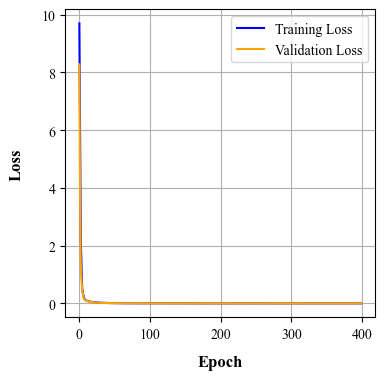

In [27]:
# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'
rcParams['font.sans-serif'] = ['Times New Roman']

# Set font for axis labels
label_font = {'family': 'Times New Roman', 'color': 'black', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(4, 4))

plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.xlabel('Epoch', fontdict=label_font, labelpad=10)  # Add label padding
plt.ylabel('Loss', fontdict=label_font, labelpad=12)   # Add label padding

plt.legend()
plt.grid(True)

# Save the plot as a JPG with DPI 5000 to D:/loss_curves.jpg
plt.savefig('D:/loss_curves.jpeg', dpi=5000, bbox_inches='tight', pad_inches=0.15)

plt.show()

### Save loss value to CSV file

In [28]:
# Extract loss and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Save loss history to a CSV file
np.savetxt('training_loss_history.csv', training_loss, delimiter=',', header='Training Loss', comments='')
np.savetxt('validation_loss_history.csv', validation_loss, delimiter=',', header='Validation Loss', comments='')

### Load the unknown test data into a DataFrame

In [39]:
# Load the test dataset containing X-ray diffraction data for materials with unknown defect percentage

df_unknown_test = pd.read_csv('D:/New folder/silicon_defect_1pct_random indices_30.csv', header=None, names=['2θ', 'Intensity'])

### Preprocess the unknown test data

In [40]:
# Extract features from the test dataset for materials with unknown defect percentage

X_unknown_test_raw = extract_features(df_unknown_test, sequence_length)

In [41]:
print(X_unknown_test_raw)
print("\nSize of X_unknown_test_raw:")
print(X_unknown_test_raw.size)
# Print the shape of X_unknown_test_raw
print("\nShape of X_unknown_test_raw:")
print(X_unknown_test_raw.shape)

[[1.37500000e+01 5.05397987e+00 1.37500000e+01 5.00000000e+00
  2.25000000e+01 2.55427125e+01 6.75000000e+00 9.37500000e+00
  1.37500000e+01 1.81250000e+01 2.07500000e+01 1.75000000e+01
  8.75000000e+00 3.67562172e-01 4.37624964e+00 1.46491610e+01
  8.09015114e+00 1.00000000e+00 5.93735622e-03 8.12386127e-03
  3.39507144e-03 6.39020279e-29 6.11586813e-02 6.59971220e-05
  2.33370339e-06 4.12765091e-04 3.39507144e-03 7.75576602e-03
  1.46866200e-02 6.11586813e-02 7.34300093e-03 1.36826240e+00
  5.44828507e-03 1.00613354e-02 7.45517490e+00 9.75080565e-01]
 [3.12550000e+01 5.05397987e+00 3.12550000e+01 2.25050000e+01
  4.00050000e+01 2.55427125e+01 2.42550000e+01 2.68800000e+01
  3.12550000e+01 3.56300000e+01 3.82550000e+01 1.75000000e+01
  8.75000000e+00 1.61701484e-01 4.37624964e+00 3.16608661e+01
  8.14762910e+00 1.00000000e+00 3.02026154e-01 4.59673195e+00
  3.15502052e-03 3.84534410e-06 1.00000000e+02 2.11299446e+01
  8.60855318e-04 1.97611560e-03 3.15502052e-03 4.60104404e-03
  6.285

In [42]:
# Scale the features of the test dataset for materials with unknown defect percentage

X_unknown_test_scaled = scaler.transform(X_unknown_test_raw)

In [43]:
print(X_unknown_test_scaled)
# Print the shape of X_unknown_test_scaled
print("\nShape of X_unknown_test_scaled:")
print(X_unknown_test_scaled.shape)

# Print the size of X_unknown_test_scaled
print("\nSize of X_unknown_test_scaled:")
print(X_unknown_test_scaled.size)

[[-1.7123907  -0.47156386 -1.45595844 -1.20196627 -1.79278916 -0.44990371
  -1.25883233 -1.3217947  -1.45595844 -1.59981027 -1.72782451 -0.49716171
  -0.32318289  0.38067282 -0.4357458  -1.79412794  0.04463504  0.29617149
  -1.45645739 -1.22686376 -0.63948811 -0.76948935 -1.08347945 -0.8370215
  -1.25340302 -1.4069283  -0.63948811 -0.29919053 -0.20605437 -1.08345467
   0.10254969 -2.15101935 -1.42407005 -1.2284557   2.49211953 -2.27726692]
 [-0.81844057 -0.47156386 -0.70026878 -0.40819641 -1.00711529 -0.44990371
  -0.48370084 -0.55839612 -0.70026878 -0.83714335 -0.95123842 -0.49716171
  -0.32318289 -0.3306911  -0.4357458  -0.9203664   0.31379931  0.29617149
   1.20663854  1.56255244 -0.69096935 -0.76503544  1.65883764  1.75931635
  -0.72873301 -0.77446395 -0.69096935 -0.65256487 -0.65049129  1.65884574
  -0.49722247  1.26078409  1.26869305  1.56129363 -1.00719731 -0.66324629]
 [ 0.07550956 -0.47156386  0.05542088  0.38557344 -0.22144141 -0.44990371
   0.29143064  0.20500246  0.05542088

In [44]:
# Reshape the scaled test dataset for materials with unknown defect percentage

X_unknown_test_reshaped = X_unknown_test_scaled.reshape(X_unknown_test_scaled.shape[0], 1, X_unknown_test_scaled.shape[1])

In [45]:
print(X_unknown_test_reshaped)
# Print the shape of X_unknown_test_scaled
print("\nShape of X_unknown_test_scaled:")
print(X_unknown_test_scaled.shape)

# Print the size of X_unknown_test_scaled
print("\nSize of X_unknown_test_scaled:")
print(X_unknown_test_scaled.size)

[[[-1.7123907  -0.47156386 -1.45595844 -1.20196627 -1.79278916
   -0.44990371 -1.25883233 -1.3217947  -1.45595844 -1.59981027
   -1.72782451 -0.49716171 -0.32318289  0.38067282 -0.4357458
   -1.79412794  0.04463504  0.29617149 -1.45645739 -1.22686376
   -0.63948811 -0.76948935 -1.08347945 -0.8370215  -1.25340302
   -1.4069283  -0.63948811 -0.29919053 -0.20605437 -1.08345467
    0.10254969 -2.15101935 -1.42407005 -1.2284557   2.49211953
   -2.27726692]]

 [[-0.81844057 -0.47156386 -0.70026878 -0.40819641 -1.00711529
   -0.44990371 -0.48370084 -0.55839612 -0.70026878 -0.83714335
   -0.95123842 -0.49716171 -0.32318289 -0.3306911  -0.4357458
   -0.9203664   0.31379931  0.29617149  1.20663854  1.56255244
   -0.69096935 -0.76503544  1.65883764  1.75931635 -0.72873301
   -0.77446395 -0.69096935 -0.65256487 -0.65049129  1.65884574
   -0.49722247  1.26078409  1.26869305  1.56129363 -1.00719731
   -0.66324629]]

 [[ 0.07550956 -0.47156386  0.05542088  0.38557344 -0.22144141
   -0.44990371  0.291

### Make predictions on the unknown test data

In [46]:
# Make predictions on the test dataset with unknown defect percentage

predictions_unknown = model.predict(X_unknown_test_reshaped)

1/1 [==============================] - 0s 92ms/step


In [47]:
print(predictions_unknown)
# Print the shape of X_unknown_test_reshaped
print("\nShape of X_unknown_test_reshaped:")
print(X_unknown_test_reshaped.shape)

# Print the size of X_unknown_test_reshaped
print("\nSize of X_unknown_test_reshaped:")
print(X_unknown_test_reshaped.size)

[[0.98218846]
 [1.0161216 ]
 [0.9910232 ]
 [0.96690875]
 [0.952958  ]]

Shape of X_unknown_test_reshaped:
(5, 1, 36)

Size of X_unknown_test_reshaped:
180


### Calculate the overall defect percentage for the unknown test data

In [48]:
# Calculate the overall defect percentage based on the model predictions

overall_defect_percentage = np.mean(predictions_unknown)

print(f"Overall Defect Percentage: {overall_defect_percentage}")

Overall Defect Percentage: 0.9818399548530579


### Save the Results to txt file

In [49]:
# Assuming predictions_unknown is a 2D array and defect_percentage is the overall defect percentage

result_filename = 'results_silicon_defect_1pct_random indices_30.txt'

with open(result_filename, 'w') as file:
    for prediction in predictions_unknown:
        file.write(str(prediction[0]) + '\n')

    file.write("Overall Defect Percentage = " + str(overall_defect_percentage) + '\n')
    file.write("Overall Defect Percentage: {:.2f}%".format(overall_defect_percentage) + '\n')
    file.write(f"Overall Defect Percentage: {overall_defect_percentage}")

print(f"Results saved to {result_filename}")

Results saved to results_silicon_defect_1pct_random indices_30.txt


## t-SNE Plot 

### Apply t-SNE to X_train before training the LSTM

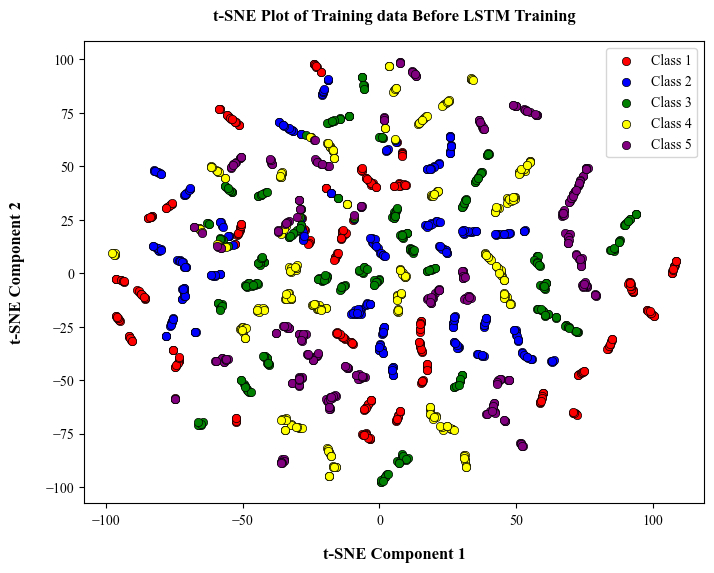

In [52]:
# Set font for titles
title_font = {'family': 'Times New Roman', 'color': 'black', 'weight': 'bold', 'size': 12}

# Set font for axis labels
label_font = {'family': 'Times New Roman', 'color': 'black', 'weight': 'bold', 'size': 12}

# Apply t-SNE to the raw features before training
tsne_before = TSNE(n_components=2, perplexity=5, random_state=42)
X_train_tsne_before = tsne_before.fit_transform(X_train.reshape(X_train.shape[0], -1))

# Plot the T-SNE results for classes 1 to 5
plt.figure(figsize=(8, 6))

# Filter data points based on class labels 1 to 5 and plot with specific colors
for i in range(1, 6):
    indices = np.where(y_train == i)
    if i == 1:
        color = 'red'
    elif i == 2:
        color = 'blue'
    elif i == 3:
        color = 'green'
    elif i == 4:
        color = 'yellow'
    else:
        color = 'purple'
    plt.scatter(X_train_tsne_before[indices, 0], X_train_tsne_before[indices, 1], label=f'Class {i}', color=color, marker='o', edgecolors='k', linewidths=0.5)

# Add a legend to show the class labels
plt.legend()

# Set the title font properties
plt.title('t-SNE Plot of Training data Before LSTM Training', fontdict=title_font, pad=15)

# Set the x and y labels with specified font properties
plt.xlabel('t-SNE Component 1', fontdict=label_font, labelpad=15)
plt.ylabel('t-SNE Component 2', fontdict=label_font, labelpad=15)


# Save the plot in JPEG format with DPI 5000 and adjust bounding box for tight layout
plt.savefig('D:/tsne_before lstm_plot.jpg', dpi=4000, bbox_inches='tight', pad_inches=0.3)

# Display the plot
plt.show()

### Shape and Size of X_train before t-SNE

In [54]:
# Create a DataFrame with t-SNE components and class labels before training
tsne_before_df = pd.DataFrame(data={'t-SNE Component 1': X_train_tsne_before[:, 0],
                                     't-SNE Component 2': X_train_tsne_before[:, 1],
                                     'Class': y_train})

# Save the DataFrame to a CSV file
tsne_before_df.to_csv('tsne_results_before_training.csv', index=False)

### Apply t-SNE to X_train after training the LSTM

55/55 [==============================] - 3s 22ms/step


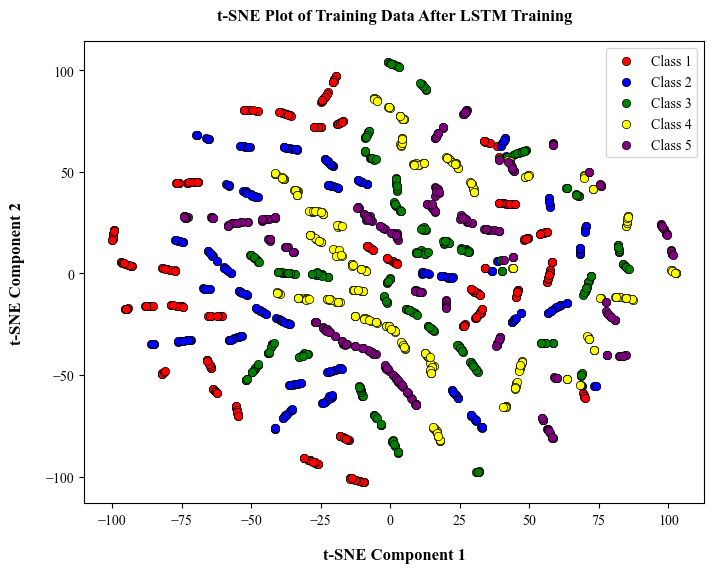

In [55]:
# Create a new model to extract features from the second-to-last layer

lstm_layer_output_model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

# Filter data points based on class labels 1 to 5
X_train_filtered = X_train[(y_train >= 1) & (y_train <= 5)]
y_train_filtered = y_train[(y_train >= 1) & (y_train <= 5)]

# Extract features from the trained LSTM model for filtered data
X_train_features_filtered = lstm_layer_output_model.predict(X_train_filtered)

# Apply T-SNE to the features of filtered data
tsne_filtered = TSNE(n_components=2, perplexity=5, random_state=42)
X_train_tsne_filtered = tsne_filtered.fit_transform(X_train_features_filtered.reshape(X_train_features_filtered.shape[0], -1))

# Plot the T-SNE results for filtered data with specific colors for each class
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'purple']  # Define colors for each class
for i in range(1, 6):
    indices = y_train_filtered == i
    plt.scatter(X_train_tsne_filtered[indices, 0], X_train_tsne_filtered[indices, 1], c=colors[i-1], label=f'Class {i}', marker='o', edgecolors='k', linewidths=0.5)

plt.legend()
plt.title('t-SNE Plot of Training Data After LSTM Training', fontdict=title_font, pad=15)
plt.xlabel('t-SNE Component 1', fontdict=label_font, labelpad=15)
plt.ylabel('t-SNE Component 2', fontdict=label_font, labelpad=15)

# Save the plot in JPEG format with DPI 5000 and adjust bounding box for tight layout
plt.savefig('D:/tsne_after_lstm_plot_separate_colors.jpg', dpi=4000, bbox_inches='tight', pad_inches=0.3)

# Display the plot
plt.show()